<a href="https://colab.research.google.com/github/Wilanth/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm_bscdpdm23

### 643021266-5 นางสาวธิติพร ใจเอื้อ

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

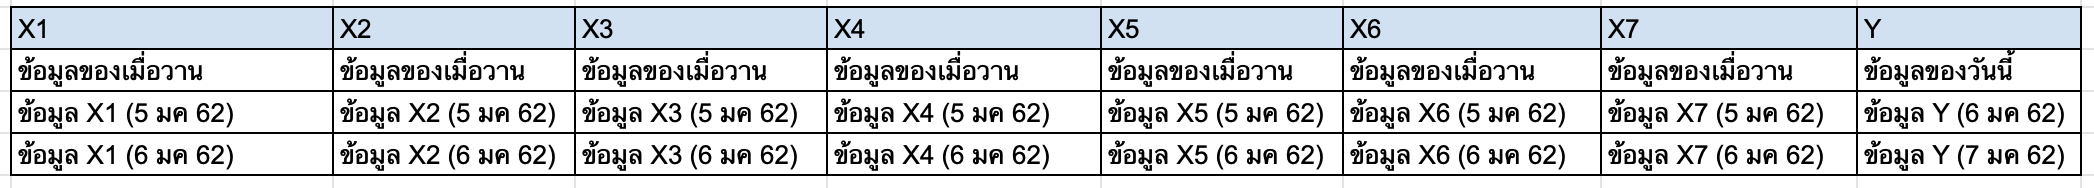

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# เชื่อมบัญชีกับ google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_dpdm2023/อุตุ')
!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [ ]:
!ls #ในโฟลเดอร์นั้นมีไฟล์อะไรอยู่ในนั้น

'ความกด(เปอร์เซ็นต์)'	 'ความเร็วลม(นอต)'   'ปริมาณฝน(มิลลิเมตร)'	     'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'จำนวนเมฆ(10ส่วน)'  'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


# เตรียมข้อมูลอุตุนิยมวิทยา

อุตุนิยมวิทยา (Meteorology)

1. Atmospheric pressure = ความกดอากาศ (%) -> pressure

2. Relative Humidity = ความชื้นสัมพัทธ์ (%) -> humidity

3. Wind Speed = ความเร็วลม (นอต) -> wind

4. Cloud Amount = จำนวนเมฆ (10 ส่วน) -> clouds

5. Rainfall = ปริมาณฝน (มิลิเมตร) -> rainfall

6. Dew point temperature = อุณหภูมิจุดน้ำค้าง (เซลเซียส) -> dewpoint

7. Dry-bulb temperature = อุณหภูมิตุ้มแห้ง (เซลเซียส) -> drybulb

8. Minimum degree = อุณหภูมิต่ำสุด (เซลเซียส) -> minimum

จังหวัด

1. ขอนแก่น (Khon Kaen) -> KKN

2. นครพนม (Nakhon Phanom) -> NPM

3. สกลนคร (Sakon Nakhon) -> SNK

4. หนองคาย (Nong Khai)  -> NKI

5. เลย (Loei) -> LEI

# Import data & แก้ Missing

## ความกดอากาศ (เปอร์เซ็นต์)

In [ ]:
#Atmospheric pressure = ความกดอากาศ (%) -> pressure
# จ.ขอนแก่น = KKN
kkn_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkn_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [ ]:
# จ.นครพนม = NPM
npm_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
npm_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [ ]:
# จ.สกลนคร = SNK
snk_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
snk_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [ ]:
# จ.หนองคาย = NKI
nki_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nki_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [ ]:
# จ.เลย = LEI
lei_pressure = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_pressure.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


### เปลี่ยนชื่อ column

In [ ]:
column_name_pressure = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_pressure = kkn_pressure.rename(columns=column_name_pressure)

In [ ]:
kkn_pressure['year'] = kkn_pressure['ปี/เดือน/วัน'].dt.year
kkn_pressure['month'] = kkn_pressure['ปี/เดือน/วัน'].dt.month
kkn_pressure['day'] = kkn_pressure['ปี/เดือน/วัน'].dt.day
kkn_pressure = kkn_pressure.drop(['ปี/เดือน/วัน'], axis =1)
kkn_pressure.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667,2012,2,1


In [ ]:
npm_pressure = npm_pressure.rename(columns=column_name_pressure)

In [ ]:
npm_pressure['year'] = npm_pressure['ปี/เดือน/วัน'].dt.year
npm_pressure['month'] = npm_pressure['ปี/เดือน/วัน'].dt.month
npm_pressure['day'] = npm_pressure['ปี/เดือน/วัน'].dt.day
npm_pressure = npm_pressure.drop(['ปี/เดือน/วัน'], axis =1)
npm_pressure.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000,2012,2,1


In [ ]:
snk_pressure = snk_pressure.rename(columns=column_name_pressure)

In [ ]:
snk_pressure['year'] = snk_pressure['ปี/เดือน/วัน'].dt.year
snk_pressure['month'] = snk_pressure['ปี/เดือน/วัน'].dt.month
snk_pressure['day'] = snk_pressure['ปี/เดือน/วัน'].dt.day
snk_pressure = snk_pressure.drop(['ปี/เดือน/วัน'], axis =1)
snk_pressure

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000,2012,2,1
5,3,352201-หนองคาย จ.หนองคาย,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,1010.52,...,1009.83,1008.81,1008.29,1008.93,1009.38,1012.62,1010.898710,2012,10,1
6,4,352201-หนองคาย จ.หนองคาย,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,1008.69,...,1011.47,1011.38,1010.89,1010.67,1009.88,-,1011.054333,2012,11,1
7,5,352201-หนองคาย จ.หนองคาย,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,1012.38,...,1012.58,1011.33,1010.65,1010.82,1014.19,1016.29,1012.625806,2012,12,1
8,6,352201-หนองคาย จ.หนองคาย,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,1012.59,...,1013.54,1015.37,1017.02,1015.94,1015.75,1016.68,1014.938387,2013,1,1
9,7,352201-หนองคาย จ.หนองคาย,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,1009.27,...,1011.07,1008.70,1007.22,-,-,-,1012.235000,2013,2,1


In [ ]:
nki_pressure = nki_pressure.rename(columns=column_name_pressure)

In [ ]:
nki_pressure['year'] = nki_pressure['ปี/เดือน/วัน'].dt.year
nki_pressure['month'] = nki_pressure['ปี/เดือน/วัน'].dt.month
nki_pressure['day'] = nki_pressure['ปี/เดือน/วัน'].dt.day
nki_pressure = nki_pressure.drop(['ปี/เดือน/วัน'], axis =1)
nki_pressure.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667,2012,2,1


In [ ]:
lei_pressure = lei_pressure.rename(columns=column_name_pressure)

In [ ]:
lei_pressure['year'] = lei_pressure['ปี/เดือน/วัน'].dt.year
lei_pressure['month'] = lei_pressure['ปี/เดือน/วัน'].dt.month
lei_pressure['day'] = lei_pressure['ปี/เดือน/วัน'].dt.day
lei_pressure = lei_pressure.drop(['ปี/เดือน/วัน'], axis =1)
lei_pressure.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่




In [ ]:
kkn_pressure=kkn_pressure.replace('-',np.NaN)
print(kkn_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667,2012,2,1


In [ ]:
npm_pressure=npm_pressure.replace('-',np.NaN)
print(npm_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1012.80,1011.83,1010.00,1010.60,1011.13,NaN,1012.184667,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.15,1011.56,1010.71,1011.95,1013.77,1015.50,1013.510000,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1006.42,1008.93,1007.88,1007.29,1011.13,NaN,1010.608000,2012,2,1


In [ ]:
snk_pressure=snk_pressure.replace('-',np.NaN)
print(snk_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,1010.74,...,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,1007.41,...,1012.96,1011.91,1010.10,1010.78,1011.06,NaN,1012.255000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,1012.82,...,1019.96,1017.56,1017.02,1015.80,1016.96,1017.63,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,1019.52,...,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,1011.60,...,1005.94,1008.70,1007.38,1007.25,1011.06,NaN,1010.554000,2012,2,1


In [ ]:
nki_pressure=nki_pressure.replace('-',np.NaN)
print(nki_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1013.08,1011.62,1010.21,1010.71,1011.10,NaN,1012.332333,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.32,1007.59,1006.66,1007.07,1011.10,NaN,1010.214667,2012,2,1


In [ ]:
lei_pressure=lei_pressure.replace('-',np.NaN)
print(lei_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,1010.36,...,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,1007.65,...,1013.30,1011.92,1009.86,1010.10,1010.43,NaN,1012.078333,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,1012.23,...,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,1018.10,...,1011.72,1010.91,1010.31,1010.16,1012.61,1014.40,1012.367419,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,1009.60,...,1005.05,1006.27,1005.59,1006.52,1010.43,NaN,1009.516667,2012,2,1


### แก้ Missing โดยการแทนค่า



In [ ]:
#kkn_pressure[kkn_pressure['...'].isnull()]

In [ ]:
for i in range(len(kkn_pressure['ที่'])):kkn_pressure.iloc[i,:]=kkn_pressure.iloc[i,:].fillna(kkn_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(npm_pressure['ที่'])):npm_pressure.iloc[i,:]=npm_pressure.iloc[i,:].fillna(npm_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(snk_pressure['ที่'])):snk_pressure.iloc[i,:]=snk_pressure.iloc[i,:].fillna(snk_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(nki_pressure['ที่'])):nki_pressure.iloc[i,:]=nki_pressure.iloc[i,:].fillna(nki_pressure.iloc[i]['เฉลี่ย'])
for i in range(len(lei_pressure['ที่'])):lei_pressure.iloc[i,:]=lei_pressure.iloc[i,:].fillna(lei_pressure.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
kkn_pressure=kkn_pressure.replace('-',np.NaN)
print(kkn_pressure.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_pressure.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667,2012,2,1


## ความชื้นสัมพันธ์(เปอร์เซ็นต์)

In [ ]:
# Relative Humidity = ความชื้นสัมพัทธ์ (%) -> humidity
# จ.ขอนแก่น = KKN
kkn_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
kkn_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [ ]:
# จ.นครพนม = NPM
npm_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
npm_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [ ]:
# จ.สกลนคร = SNK
snk_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
snk_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [ ]:
# จ.หนองคาย = NKI
nki_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
nki_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [ ]:
# จ.เลย = LEI
lei_humidity = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)
lei_humidity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


### เปลี่ยนชื่อ column

In [ ]:
column_name_humidity = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_humidity = kkn_humidity.rename(columns=column_name_humidity)

In [ ]:
kkn_humidity['year'] = kkn_humidity['ปี/เดือน/วัน'].dt.year
kkn_humidity['month'] = kkn_humidity['ปี/เดือน/วัน'].dt.month
kkn_humidity['day'] = kkn_humidity['ปี/เดือน/วัน'].dt.day
kkn_humidity = kkn_humidity.drop(['ปี/เดือน/วัน'], axis =1)
kkn_humidity.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,69,69,75,71,71,68,79,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,67,68,67,67,65,-,68,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,62,65,66,63,64,63,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,71,75,69,70,67,68,69,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,57,71,73,68,-,-,65,2012,2,1


In [ ]:
npm_humidity = npm_humidity.rename(columns=column_name_humidity)

In [ ]:
npm_humidity['year'] = npm_humidity['ปี/เดือน/วัน'].dt.year
npm_humidity['month'] = npm_humidity['ปี/เดือน/วัน'].dt.month
npm_humidity['day'] = npm_humidity['ปี/เดือน/วัน'].dt.day
npm_humidity = npm_humidity.drop(['ปี/เดือน/วัน'], axis =1)
npm_humidity.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,69,71,66,72,70,69,77,2011,10,1
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,78,74,69,66,65,-,69,2011,11,1
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,61,70,71,63,66,70,65,2011,12,1
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,67,74,71,61,59,62,71,2012,1,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,64,68,76,69,-,-,65,2012,2,1


In [ ]:
snk_humidity = snk_humidity.rename(columns=column_name_humidity)

In [ ]:
snk_humidity['year'] = snk_humidity['ปี/เดือน/วัน'].dt.year
snk_humidity['month'] = snk_humidity['ปี/เดือน/วัน'].dt.month
snk_humidity['day'] = snk_humidity['ปี/เดือน/วัน'].dt.day
snk_humidity = snk_humidity.drop(['ปี/เดือน/วัน'], axis =1)
snk_humidity.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,87,88,77,75,87,86,81,77,...,72,72,70,74,73,72,78,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,71,71,71,72,73,70,75,68,...,71,70,70,69,69,-,70,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,66,61,64,67,70,73,72,71,...,62,69,69,69,69,68,6,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,67,69,66,63,65,67,65,69,...,72,73,71,64,64,62,72,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,66,70,67,69,73,64,60,64,...,64,69,74,71,-,-,64,2012,2,1


In [ ]:
nki_humidity = nki_humidity.rename(columns=column_name_humidity)

In [ ]:
nki_humidity['year'] = nki_humidity['ปี/เดือน/วัน'].dt.year
nki_humidity['month'] = nki_humidity['ปี/เดือน/วัน'].dt.month
nki_humidity['day'] = nki_humidity['ปี/เดือน/วัน'].dt.day
nki_humidity = nki_humidity.drop(['ปี/เดือน/วัน'], axis =1)
nki_humidity.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,89,91,78,75,90,88,87,74,...,71,70,71,70,66,68,76,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,68,66,66,67,68,69,68,73,...,67,68,69,71,69,-,68,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,67,62,66,66,65,68,71,67,...,58,67,71,70,67,68,65,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,67,70,68,65,73,68,66,69,...,68,71,69,65,68,73,70,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,68,71,91,79,78,71,67,69,...,62,69,76,69,-,-,69,2012,2,1


In [ ]:
lei_humidity = lei_humidity.rename(columns=column_name_humidity)

In [ ]:
lei_humidity['year'] = lei_humidity['ปี/เดือน/วัน'].dt.year
lei_humidity['month'] = lei_humidity['ปี/เดือน/วัน'].dt.month
lei_humidity['day'] = lei_humidity['ปี/เดือน/วัน'].dt.day
lei_humidity = lei_humidity.drop(['ปี/เดือน/วัน'], axis =1)
lei_humidity.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,84,85,85,82,83,85,87,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,81,80,84,82,79,-,82,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,74,80,80,78,81,78,77,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,79,80,78,77,82,79,78,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,67,76,73,70,-,-,73,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่

In [ ]:
kkn_humidity=kkn_humidity.replace('-',np.NaN)
print(kkn_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,69,69,75,71.0,71.0,68.0,79,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,67,68,67,67.0,65.0,NaN,68,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,60,62,65,66.0,63.0,64.0,63,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,71,75,69,70.0,67.0,68.0,69,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,57,71,73,68.0,NaN,NaN,65,2012,2,1


In [ ]:
npm_humidity=npm_humidity.replace('-',np.NaN)
print(npm_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,69,71,66,72.0,70.0,69.0,77,2011,10,1
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,78,74,69,66.0,65.0,NaN,69,2011,11,1
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,61,70,71,63.0,66.0,70.0,65,2011,12,1
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,67,74,71,61.0,59.0,62.0,71,2012,1,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,64,68,76,69.0,NaN,NaN,65,2012,2,1


In [ ]:
snk_humidity=snk_humidity.replace('-',np.NaN)
print(snk_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,87,88,77,75,87,86,81,77,...,72,72,70,74.0,73.0,72.0,78,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,71,71,71,72,73,70,75,68,...,71,70,70,69.0,69.0,NaN,70,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,66,61,64,67,70,73,72,71,...,62,69,69,69.0,69.0,68.0,6,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,67,69,66,63,65,67,65,69,...,72,73,71,64.0,64.0,62.0,72,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,66,70,67,69,73,64,60,64,...,64,69,74,71.0,NaN,NaN,64,2012,2,1


In [ ]:
nki_humidity=nki_humidity.replace('-',np.NaN)
print(nki_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,89,91,78,75,90,88,87,74,...,71,70,71,70.0,66.0,68.0,76,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,68,66,66,67,68,69,68,73,...,67,68,69,71.0,69.0,NaN,68,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,67,62,66,66,65,68,71,67,...,58,67,71,70.0,67.0,68.0,65,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,67,70,68,65,73,68,66,69,...,68,71,69,65.0,68.0,73.0,70,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,68,71,91,79,78,71,67,69,...,62,69,76,69.0,NaN,NaN,69,2012,2,1


In [ ]:
lei_humidity=lei_humidity.replace('-',np.NaN)
print(lei_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,84,85,85,82.0,83.0,85.0,87,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,81,80,84,82.0,79.0,NaN,82,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,74,80,80,78.0,81.0,78.0,77,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,79,80,78,77.0,82.0,79.0,78,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,67,76,73,70.0,NaN,NaN,73,2012,2,1


### แก้ Missing โดยการแทนค่า


In [ ]:
for i in range(len(kkn_humidity['ที่'])):kkn_humidity.iloc[i,:]=kkn_humidity.iloc[i,:].fillna(kkn_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(npm_humidity['ที่'])):npm_humidity.iloc[i,:]=npm_humidity.iloc[i,:].fillna(npm_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(snk_humidity['ที่'])):snk_humidity.iloc[i,:]=snk_humidity.iloc[i,:].fillna(snk_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(nki_humidity['ที่'])):nki_humidity.iloc[i,:]=nki_humidity.iloc[i,:].fillna(nki_humidity.iloc[i]['เฉลี่ย'])
for i in range(len(lei_humidity['ที่'])):lei_humidity.iloc[i,:]=lei_humidity.iloc[i,:].fillna(lei_humidity.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
lei_humidity=lei_humidity.replace('-',np.NaN)
print(lei_humidity.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_humidity.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,90,95,92,89,86,94,90,88,...,84,85,85,82.0,83.0,85.0,87,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,85,83,84,83,83,85,83,82,...,81,80,84,82.0,79.0,82.0,82,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,80,77,77,76,78,83,82,79,...,74,80,80,78.0,81.0,78.0,77,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,75,78,81,79,73,77,82,78,...,79,80,78,77.0,82.0,79.0,78,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,79,81,91,84,78,73,69,71,...,67,76,73,70.0,73.0,73.0,73,2012,2,1


## ความเร็วลม(นอต)

In [ ]:
# Wind Speed = ความเร็วลม (นอต) -> wind
# จ.ขอนแก่น = KKN
kkn_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
kkn_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [ ]:
# จ.นครพนม = NPM
npm_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
npm_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [ ]:
# จ.สกลนคร = SNK
snk_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
snk_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
# จ.หนองคาย = NKI
nki_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
nki_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [ ]:
# จ.เลย = LEI
lei_wind = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)
lei_wind.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


### เปลี่ยนชื่อ column

In [ ]:
column_name_wind = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_wind = kkn_wind.rename(columns=column_name_wind)

In [ ]:
kkn_wind['year'] = kkn_wind['ปี/เดือน/วัน'].dt.year
kkn_wind['month'] = kkn_wind['ปี/เดือน/วัน'].dt.month
kkn_wind['day'] = kkn_wind['ปี/เดือน/วัน'].dt.day
kkn_wind = kkn_wind.drop(['ปี/เดือน/วัน'], axis =1)
kkn_wind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,5,5,4,6,4,5,3.354839,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,5,3,1,3,3,-,3.466667,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,6,5,4,4,6,5,4.806452,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,2,2,1,3,4,4,3.129032,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,2,4,3,3,3,-,2.566667,2012,2,1


In [ ]:
npm_wind = npm_wind.rename(columns=column_name_wind)

In [ ]:
npm_wind['year'] = npm_wind['ปี/เดือน/วัน'].dt.year
npm_wind['month'] = npm_wind['ปี/เดือน/วัน'].dt.month
npm_wind['day'] = npm_wind['ปี/เดือน/วัน'].dt.day
npm_wind = npm_wind.drop(['ปี/เดือน/วัน'], axis =1)
npm_wind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,1,2,2,1,1,1,1.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,1,1,1,1,-,1.200000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,1,2,1,1,2,2,1.741935,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,2,3,3,4,...,1,1,1,4,5,4,2.448276,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0,0,1,1,4,...,3,3,3,1,2,-,2.200000,2012,2,1


In [ ]:
snk_wind = snk_wind.rename(columns=column_name_wind)

In [ ]:
snk_wind['year'] = snk_wind['ปี/เดือน/วัน'].dt.year
snk_wind['month'] = snk_wind['ปี/เดือน/วัน'].dt.month
snk_wind['day'] = snk_wind['ปี/เดือน/วัน'].dt.day
snk_wind = snk_wind.drop(['ปี/เดือน/วัน'], axis =1)
snk_wind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2,1,0,2,1,...,1,2,2,1,1,1,1.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1,1,1,1,1,...,2,1,1,1,1,-,1.200000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1,1,1,1,2,...,1,2,1,1,2,2,1.741935,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,3,2,3,3,3,4,2.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,3,7,5,3,2,-,2.733333,2012,2,1


In [ ]:
nki_wind = nki_wind.rename(columns=column_name_wind)

In [ ]:
nki_wind['year'] = nki_wind['ปี/เดือน/วัน'].dt.year
nki_wind['month'] = nki_wind['ปี/เดือน/วัน'].dt.month
nki_wind['day'] = nki_wind['ปี/เดือน/วัน'].dt.day
nki_wind = nki_wind.drop(['ปี/เดือน/วัน'], axis =1)
nki_wind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2,1,3,1,2,...,3,3,3,3,3,4,2.580645,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2,2,1,2,3,...,3,2,2,2,2,-,2.433333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2,2,2,2,4,...,4,2,2,2,3,2,3.161290,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5,3,2,4,3,...,3,2,3,3,3,4,2.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2,1,2,2,3,...,3,7,5,3,2,-,2.733333,2012,2,1


In [ ]:
lei_wind = lei_wind.rename(columns=column_name_wind)

In [ ]:
lei_wind['year'] = lei_wind['ปี/เดือน/วัน'].dt.year
lei_wind['month'] = lei_wind['ปี/เดือน/วัน'].dt.month
lei_wind['day'] = lei_wind['ปี/เดือน/วัน'].dt.day
lei_wind = lei_wind.drop(['ปี/เดือน/วัน'], axis =1)
lei_wind.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3,2,1,1,...,2,1,2,2,2,1,1.612903,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2,2,2,2,...,1,2,1,2,1,-,1.700000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1,2,1,1,...,2,1,2,1,2,2,1.870968,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2,2,2,2,...,2,2,2,2,1,1,1.838710,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1,2,1,2,...,1,3,4,2,1,-,1.700000,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_wind=kkn_wind.replace('-',np.NaN)
print(kkn_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_wind.head()

ที่       False
สถานี     False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,3,2,3.0,2,2,3,4,3,...,5,5,4,6.0,4.0,5.0,3.354839,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,4,5,3.0,3,5,2,3,3,...,5,3,1,3.0,3.0,NaN,3.466667,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,3,4,4.0,4,4,4,4,4,...,6,5,4,4.0,6.0,5.0,4.806452,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,4,2,1.0,4,4,2,4,6,...,2,2,1,3.0,4.0,4.0,3.129032,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3.0,2,3,1,2,3,...,2,4,3,3.0,3.0,NaN,2.566667,2012,2,1


In [ ]:
npm_wind=npm_wind.replace('-',np.NaN)
print(npm_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_wind.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4          True
5          True
6         False
7          True
8          True
9         False
10         True
11         True
12         True
13        False
14        False
15         True
16         True
17        False
18         True
19        False
20         True
21         True
22         True
23        False
24         True
25         True
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1.0,0,2.0,1.0,...,1,2,2.0,1.0,1.0,1.0,1.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1.0,1,1.0,1.0,...,2,1,1.0,1.0,1.0,NaN,1.200000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1.0,1,1.0,2.0,...,1,2,1.0,1.0,2.0,2.0,1.741935,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,2.0,3,3.0,4.0,...,1,1,1.0,4.0,5.0,4.0,2.448276,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,1,3,4,0.0,0.0,1,1.0,4.0,...,3,3,3.0,1.0,2.0,NaN,2.200000,2012,2,1


In [ ]:
snk_wind=snk_wind.replace('-',np.NaN)
print(snk_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_wind.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20         True
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,1,2,2.0,1,0,2,1,...,1,2,2,1.0,1.0,1.0,1.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,1,1,1.0,1,1,1,1,...,2,1,1,1.0,1.0,NaN,1.200000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,2,2,1.0,1,1,1,2,...,1,2,1,1.0,2.0,2.0,1.741935,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,3,2,3,3.0,3.0,4.0,2.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,3,7,5,3.0,2.0,NaN,2.733333,2012,2,1


In [ ]:
nki_wind=nki_wind.replace('-',np.NaN)
print(nki_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_wind.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,1,4,4,2.0,1,3,1,2,...,3,3,3,3.0,3.0,4.0,2.580645,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,3,3,3,2.0,2,1,2,3,...,3,2,2,2.0,2.0,NaN,2.433333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,5,3,2.0,2,2,2,4,...,4,2,2,2.0,3.0,2.0,3.161290,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,3,5.0,3,2,4,3,...,3,2,3,3.0,3.0,4.0,2.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,3,4,2.0,1,2,2,3,...,3,7,5,3.0,2.0,NaN,2.733333,2012,2,1


In [ ]:
lei_wind=lei_wind.replace('-',np.NaN)
print(lei_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_wind.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5          True
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19         True
20        False
21        False
22        False
23        False
24         True
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,2,2,3,2,3.0,2,1,1,...,2,1,2,2.0,2.0,1.0,1.612903,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,2,1,1,2.0,2,2,2,...,1,2,1,2.0,1.0,NaN,1.700000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,2,3,2,1.0,2,1,1,...,2,1,2,1.0,2.0,2.0,1.870968,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,2,2,1,2,2.0,2,2,2,...,2,2,2,2.0,1.0,1.0,1.838710,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,1,2,2,1,1.0,2,1,2,...,1,3,4,2.0,1.0,NaN,1.700000,2012,2,1


### แก้ Missing โดยการแทนค่า



In [ ]:
for i in range(len(kkn_wind['ที่'])):kkn_wind.iloc[i,:]=kkn_wind.iloc[i,:].fillna(kkn_wind.iloc[i]['เฉลี่ย'])
for i in range(len(npm_wind['ที่'])):npm_wind.iloc[i,:]=npm_wind.iloc[i,:].fillna(npm_wind.iloc[i]['เฉลี่ย'])
for i in range(len(snk_wind['ที่'])):snk_wind.iloc[i,:]=snk_wind.iloc[i,:].fillna(snk_wind.iloc[i]['เฉลี่ย'])
for i in range(len(nki_wind['ที่'])):nki_wind.iloc[i,:]=nki_wind.iloc[i,:].fillna(nki_wind.iloc[i]['เฉลี่ย'])
for i in range(len(lei_wind['ที่'])):lei_wind.iloc[i,:]=lei_wind.iloc[i,:].fillna(lei_wind.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
kkn_wind=kkn_wind.replace('-',np.NaN)
print(kkn_wind.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_wind.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,3,2,3.0,2,2,3,4,3,...,5,5,4,6.0,4.0,5.000000,3.354839,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,4,5,3.0,3,5,2,3,3,...,5,3,1,3.0,3.0,3.466667,3.466667,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,3,4,4.0,4,4,4,4,4,...,6,5,4,4.0,6.0,5.000000,4.806452,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,4,2,1.0,4,4,2,4,6,...,2,2,1,3.0,4.0,4.000000,3.129032,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3.0,2,3,1,2,3,...,2,4,3,3.0,3.0,2.566667,2.566667,2012,2,1


## จำนวนเมฆ (10ส่วน)

In [ ]:
# Cloud Amount = จำนวนเมฆ (10 ส่วน) -> clouds
# จ.ขอนแก่น = KKN
kkn_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
kkn_clouds

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,3,7,8,7,9,...,5,5,3,4,3,6,5,5,4,4.548387
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,4,4,2,3,3,3,2,...,5,8,8,5,7,6,7,5,-,4.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,5,5,6,5,5,5,...,7,3,5,6,3,1,2,3,6,3.741935
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [ ]:
# จ.นครพนม = NPM
npm_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
npm_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [ ]:
# จ.สกลนคร = SNK
snk_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
snk_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857


In [ ]:
# จ.หนองคาย = NKI
nki_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
nki_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571


In [ ]:
# จ.เลย = LEI
lei_clouds = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)
lei_clouds.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### เปลี่ยนชื่อ column

In [ ]:
column_name_clouds = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_clouds = kkn_clouds.rename(columns=column_name_clouds)

In [ ]:
kkn_clouds['year'] = kkn_clouds['ปี/เดือน/วัน'].dt.year
kkn_clouds['month'] = kkn_clouds['ปี/เดือน/วัน'].dt.month
kkn_clouds['day'] = kkn_clouds['ปี/เดือน/วัน'].dt.day
kkn_clouds = kkn_clouds.drop(['ปี/เดือน/วัน'], axis =1)
kkn_clouds.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,9,10,10,8,10,10,10,7,...,3,3,5,4,2,2,6.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2,2,2,2,3,6,9,6,...,2,2,1,3,2,-,3.533333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,3,4,4,5,8,7,6,...,3,1,2,1,1,1,3.516129,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1,4,7,6,3,1,3,3,...,3,2,5,6,10,10,5.354839,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8,8,3,3,1,2,...,1,4,5,1,2,-,2.533333,2012,2,1


In [ ]:
npm_clouds = npm_clouds.rename(columns=column_name_clouds)

In [ ]:
npm_clouds['year'] = npm_clouds['ปี/เดือน/วัน'].dt.year
npm_clouds['month'] = npm_clouds['ปี/เดือน/วัน'].dt.month
npm_clouds['day'] = npm_clouds['ปี/เดือน/วัน'].dt.day
npm_clouds = npm_clouds.drop(['ปี/เดือน/วัน'], axis =1)
npm_clouds.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,10,7,8,8,10,10,9,4,...,2,3,3,4,2,4,5.903226,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2,2,2,3,5,7,9,6,...,2,2,2,1,1,-,3.066667,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,2,2,4,4,7,8,3,...,2,2,1,2,1,1,3.290323,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1,1,4,6,4,2,5,6,...,2,2,3,3,6,5,4.741935,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,5,5,8,7,3,3,2,1,...,3,7,6,2,1,-,2.966667,2012,2,1


In [ ]:
snk_clouds = snk_clouds.rename(columns=column_name_clouds)

In [ ]:
snk_clouds['year'] = snk_clouds['ปี/เดือน/วัน'].dt.year
snk_clouds['month'] = snk_clouds['ปี/เดือน/วัน'].dt.month
snk_clouds['day'] = snk_clouds['ปี/เดือน/วัน'].dt.day
snk_clouds = snk_clouds.drop(['ปี/เดือน/วัน'], axis =1)
snk_clouds.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,9,9,7,7,9,10,8,6,...,1,1,3,3,1,4,5.483871,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2,0,0,1,3,7,8,5,...,1,1,1,1,0,-,2.300000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,1,2,2,2,6,6,4,...,0,0,0,0,1,-,2.703704,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,0,0,4,3,2,0,1,2,...,3,0,1,4,7,8,3.548387,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,4,4,8,5,1,0,0,0,...,1,6,4,0,0,-,2.142857,2012,2,1


In [ ]:
nki_clouds = nki_clouds.rename(columns=column_name_clouds)

In [ ]:
nki_clouds['year'] = nki_clouds['ปี/เดือน/วัน'].dt.year
nki_clouds['month'] = nki_clouds['ปี/เดือน/วัน'].dt.month
nki_clouds['day'] = nki_clouds['ปี/เดือน/วัน'].dt.day
nki_clouds = nki_clouds.drop(['ปี/เดือน/วัน'], axis =1)
nki_clouds.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,10,10,8,9,9,10,10,6,...,2,1,1,1,4,3,5.580645,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1,0,0,1,1,2,6,4,...,0,1,2,4,2,-,2.571429,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,4,4,-,2,7,5,5,5,...,-,3,1,1,3,-,3.285714,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,8,2,3,4,...,6,1,0,6,10,9,4.774194,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,7,8,10,6,1,-,-,-,...,-,6,5,6,NaN,-,4.928571,2012,2,1


In [ ]:
lei_clouds = lei_clouds.rename(columns=column_name_clouds)

In [ ]:
lei_clouds['year'] = lei_clouds['ปี/เดือน/วัน'].dt.year
lei_clouds['month'] = lei_clouds['ปี/เดือน/วัน'].dt.month
lei_clouds['day'] = lei_clouds['ปี/เดือน/วัน'].dt.day
lei_clouds = lei_clouds.drop(['ปี/เดือน/วัน'], axis =1)
lei_clouds.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month,day
0,1,353301-เลย สกษ. จ.เลย,8,10,10,9,8,10,10,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2,1,2,1,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1,3,1,3,3,2,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1,1,3,6,6,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,8,5,10,7,1,0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_clouds=kkn_clouds.replace('-',np.NaN)
print(kkn_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_clouds.head()

ที่       False
สถานี     False
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,9,10,10.0,8,10,10,10,7,...,3,3,5,4.0,2.0,2.0,6.322581,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2,2,2.0,2,3,6,9,6,...,2,2,1,3.0,2.0,NaN,3.533333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2,3,4.0,4,5,8,7,6,...,3,1,2,1.0,1.0,1.0,3.516129,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1,4,7.0,6,3,1,3,3,...,3,2,5,6.0,10.0,10.0,5.354839,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,6,6,8.0,8,3,3,1,2,...,1,4,5,1.0,2.0,NaN,2.533333,2012,2,1


In [ ]:
npm_clouds=npm_clouds.replace('-',np.NaN)
print(npm_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_clouds.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11        False
12        False
13         True
14         True
15         True
16        False
17        False
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,10.0,7.0,8.0,8.0,10.0,10.0,9.0,4.0,...,2,3.0,3,4.0,2.0,4.0,5.903226,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,3.0,5.0,7.0,9.0,6.0,...,2,2.0,2,1.0,1.0,NaN,3.066667,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,2.0,2.0,2.0,4.0,4.0,7.0,8.0,3.0,...,2,2.0,1,2.0,1.0,1.0,3.290323,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,4.0,6.0,4.0,2.0,5.0,6.0,...,2,2.0,3,3.0,6.0,5.0,4.741935,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,5.0,5.0,8.0,7.0,3.0,3.0,2.0,1.0,...,3,7.0,6,2.0,1.0,NaN,2.966667,2012,2,1


In [ ]:
snk_clouds=snk_clouds.replace('-',np.NaN)
print(snk_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_clouds.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,9.0,9.0,7.0,7.0,9.0,10.0,8.0,6.0,...,1.0,1.0,3.0,3.0,1.0,4.0,5.483871,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2.0,0.0,0.0,1.0,3.0,7.0,8.0,5.0,...,1.0,1.0,1.0,1.0,0.0,NaN,2.300000,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1.0,1.0,2.0,2.0,2.0,6.0,6.0,4.0,...,0.0,0.0,0.0,0.0,1.0,NaN,2.703704,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,0.0,0.0,4.0,3.0,2.0,0.0,1.0,2.0,...,3.0,0.0,1.0,4.0,7.0,8.0,3.548387,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,4.0,4.0,8.0,5.0,1.0,0.0,0.0,0.0,...,1.0,6.0,4.0,0.0,0.0,NaN,2.142857,2012,2,1


In [ ]:
nki_clouds=nki_clouds.replace('-',np.NaN)
print(nki_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_clouds.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,10.0,10.0,8.0,9.0,9.0,10.0,10.0,6.0,...,2.0,1.0,1.0,1.0,4.0,3.0,5.580645,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,1.0,0.0,0.0,1.0,1.0,2.0,6.0,4.0,...,0.0,1.0,2.0,4.0,2.0,NaN,2.571429,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,4.0,4.0,NaN,2.0,7.0,5.0,5.0,5.0,...,NaN,3.0,1.0,1.0,3.0,NaN,3.285714,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,8.0,2.0,3.0,4.0,...,6.0,1.0,0.0,6.0,10.0,9.0,4.774194,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,7.0,8.0,10.0,6.0,1.0,NaN,NaN,NaN,...,NaN,6.0,5.0,6.0,NaN,NaN,4.928571,2012,2,1


In [ ]:
lei_clouds=lei_clouds.replace('-',np.NaN)
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

ที่            False
สถานี          False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
เฉลี่ย         False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
year           False
month          False
day            False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month,day
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,2,1


### แก้ Missing โดยการแทนค่า

In [ ]:
for i in range(len(kkn_clouds['ที่'])):kkn_clouds.iloc[i,:]=kkn_clouds.iloc[i,:].fillna(kkn_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(npm_clouds['ที่'])):npm_clouds.iloc[i,:]=npm_clouds.iloc[i,:].fillna(npm_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(snk_clouds['ที่'])):snk_clouds.iloc[i,:]=snk_clouds.iloc[i,:].fillna(snk_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(nki_clouds['ที่'])):nki_clouds.iloc[i,:]=nki_clouds.iloc[i,:].fillna(nki_clouds.iloc[i]['เฉลี่ย'])
for i in range(len(lei_clouds['ที่'])):lei_clouds.iloc[i,:]=lei_clouds.iloc[i,:].fillna(lei_clouds.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

ที่            False
สถานี          False
1              False
2              False
3              False
4              False
5              False
6              False
7              False
8              False
9              False
10             False
11             False
12             False
13             False
14             False
15             False
16             False
17             False
18             False
19             False
20             False
21             False
22             False
23             False
24             False
25             False
26             False
27             False
28             False
29             False
30             False
31             False
เฉลี่ย         False
Unnamed: 35    False
Unnamed: 36    False
Unnamed: 37    False
Unnamed: 38    False
Unnamed: 39    False
Unnamed: 40    False
Unnamed: 41    False
Unnamed: 42    False
Unnamed: 43    False
Unnamed: 44    False
year           False
month          False
day            False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,year,month,day
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,7.000000,...,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,2.000000,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,5.000000,...,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,1.000000,...,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,2.809524,...,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2012,2,1


### แก้ Missing โดยการลบข้อมูล

ref: https://blog.datath.com/cheatsheet-pandas/

In [ ]:
lei_clouds = lei_clouds.drop(columns=['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
                                      'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'])

In [ ]:
print(lei_clouds.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_clouds.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353301-เลย สกษ. จ.เลย,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,7.000000,...,4.0,2.0,3.0,3.000000,1.0,2.000000,5.387097,2011,10,1
1,2,353301-เลย สกษ. จ.เลย,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,2.000000,...,1.0,2.0,2.0,5.000000,3.0,2.333333,2.333333,2011,11,1
2,3,353301-เลย สกษ. จ.เลย,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,5.000000,...,0.0,0.0,1.0,1.000000,4.0,1.000000,2.354839,2011,12,1
3,1,353301-เลย สกษ. จ.เลย,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,1.000000,...,5.0,1.0,2.0,4.000000,9.0,8.000000,3.870968,2012,1,1
4,2,353301-เลย สกษ. จ.เลย,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,2.809524,...,0.0,1.0,3.0,2.809524,3.0,2.809524,2.809524,2012,2,1


## ปริมาณฝน(มิลลิเมตร)

In [ ]:
# Rainfall = ปริมาณฝน (มิลิเมตร) -> rainfall
# จ.ขอนแก่น = KKN
kkn_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
kkn_rainfall.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


In [ ]:
# จ.นครพนม = NPM
npm_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
npm_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


In [ ]:
# จ.สกลนคร = SNK
snk_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
snk_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [ ]:
# จ.หนองคาย = NKI
nki_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
nki_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


In [ ]:
# จ.เลย = LEI
lei_rainfall = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)
lei_rainfall.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


### เปลี่ยนชื่อ column

In [ ]:
column_name_rainfall = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_rainfall = kkn_rainfall.rename(columns=column_name_rainfall)

In [ ]:
kkn_rainfall['year'] = kkn_rainfall['ปี/เดือน/วัน'].dt.year
kkn_rainfall['month'] = kkn_rainfall['ปี/เดือน/วัน'].dt.month
kkn_rainfall['day'] = kkn_rainfall['ปี/เดือน/วัน'].dt.day
kkn_rainfall = kkn_rainfall.drop(['ปี/เดือน/วัน'], axis =1)
kkn_rainfall.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3,0,2.2,0.5,1.3,0.2,...,0,0.5,1.1,0,0,0,176.8,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,3.2,...,0,0,0,0,0,-,11.8,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,0,0,0,0,0,0,0,0,...,0,0,0,0,T,0,38.7,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0,0,T,0,0,0,0,0,...,0,0,0,0,-,-,T,2012,2,1


In [ ]:
npm_rainfall = npm_rainfall.rename(columns=column_name_rainfall)

In [ ]:
npm_rainfall['year'] = npm_rainfall['ปี/เดือน/วัน'].dt.year
npm_rainfall['month'] = npm_rainfall['ปี/เดือน/วัน'].dt.month
npm_rainfall['day'] = npm_rainfall['ปี/เดือน/วัน'].dt.day
npm_rainfall = npm_rainfall.drop(['ปี/เดือน/วัน'], axis =1)
npm_rainfall.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,17,0.3,0,0.3,1.9,T,0,0.8,...,0,0,0,0,0,0,75.4,2011,10,1
1,2,357201-นครพนม จ.นครพนม,0,0,0,0,T,T,0,0,...,0,0.5,0,0,0,-,0.5,2011,11,1
2,3,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,2011,12,1
3,1,357201-นครพนม จ.นครพนม,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14.9,2012,1,1
4,2,357201-นครพนม จ.นครพนม,0,0,T,0,0,0,0,0,...,0,1.2,0,0,-,-,1.2,2012,2,1


In [ ]:
snk_rainfall = snk_rainfall.rename(columns=column_name_rainfall)

In [ ]:
snk_rainfall['year'] = snk_rainfall['ปี/เดือน/วัน'].dt.year
snk_rainfall['month'] = snk_rainfall['ปี/เดือน/วัน'].dt.month
snk_rainfall['day'] = snk_rainfall['ปี/เดือน/วัน'].dt.day
snk_rainfall = snk_rainfall.drop(['ปี/เดือน/วัน'], axis =1)
snk_rainfall.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0,T,5.5,0.3,0,0.3,...,0,0,0,1,0,0,200.8,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,T,T,2.8,0,...,0,0,0,0,0,-,2.8,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30.4,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,0,0,0,0,0,0,0,0,...,0.4,5.6,0,0,-,-,6,2012,2,1


In [ ]:
nki_rainfall = nki_rainfall.rename(columns=column_name_rainfall)

In [ ]:
nki_rainfall['year'] = nki_rainfall['ปี/เดือน/วัน'].dt.year
nki_rainfall['month'] = nki_rainfall['ปี/เดือน/วัน'].dt.month
nki_rainfall['day'] = nki_rainfall['ปี/เดือน/วัน'].dt.day
nki_rainfall = nki_rainfall.drop(['ปี/เดือน/วัน'], axis =1)
nki_rainfall.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,48.6,59,0,1,19.1,6.2,0.2,0,...,0,0,0,0,0,0,184.3,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0.9,...,0,0,0,0,0,-,5.1,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,0,0,0,0,1.1,0,0,0,...,0,0,0,0,0,0.4,3.4,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,0,28.7,9.1,0,0,0,0,0,...,0,6.1,0,0,-,-,43.9,2012,2,1


In [ ]:
lei_rainfall = lei_rainfall.rename(columns=column_name_rainfall)

In [ ]:
lei_rainfall['year'] = lei_rainfall['ปี/เดือน/วัน'].dt.year
lei_rainfall['month'] = lei_rainfall['ปี/เดือน/วัน'].dt.month
lei_rainfall['day'] = lei_rainfall['ปี/เดือน/วัน'].dt.day
lei_rainfall = lei_rainfall.drop(['ปี/เดือน/วัน'], axis =1)
lei_rainfall.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0,0,3.4,1.8,0.6,...,0,0,0.2,0,0,0,183,2011,10,1
1,2,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0.6,0,0,-,7.4,2011,11,1
2,3,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.2,2011,12,1
3,1,353201-เลย จ.เลย,0,0,0,0,0,0,0,0,...,0,0,0,0,T,0,18.2,2012,1,1
4,2,353201-เลย จ.เลย,0,0.2,1.2,0,0,0,0,0,...,0,1,0,0,-,-,2.4,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_rainfall=kkn_rainfall.replace('-',np.NaN)
kkn_rainfall = kkn_rainfall.replace('T',0.1)
print(kkn_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_rainfall.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,1.4,17.7,3.0,0.0,2.2,0.5,1.3,0.2,...,0.0,0.5,1.1,0.0,0.0,0.0,176.8,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.0,0.0,0.0,NaN,11.8,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,38.7,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.1,2012,2,1


In [ ]:
npm_rainfall=npm_rainfall.replace('-',np.NaN)
npm_rainfall = npm_rainfall.replace('T',0.1)
print(npm_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_rainfall.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,17.0,0.3,0.0,0.3,1.9,0.1,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,75.4,2011,10,1
1,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,NaN,0.5,2011,11,1
2,3,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12,1
3,1,357201-นครพนม จ.นครพนม,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.9,2012,1,1
4,2,357201-นครพนม จ.นครพนม,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.2,0.0,0.0,NaN,NaN,1.2,2012,2,1


In [ ]:
snk_rainfall=snk_rainfall.replace('-',np.NaN)
snk_rainfall = snk_rainfall.replace('T',0.1)
print(snk_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_rainfall.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0.0,0.1,5.5,0.3,0.0,0.3,...,0.0,0.0,0.0,1.0,0.0,0.0,200.8,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.1,0.1,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2.8,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.4,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,5.6,0.0,0.0,NaN,NaN,6.0,2012,2,1


In [ ]:
nki_rainfall=nki_rainfall.replace('-',np.NaN)
nki_rainfall = nki_rainfall.replace('T',0.1)
print(nki_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_rainfall.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,48.6,59.0,0.0,1.0,19.1,6.2,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,184.3,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,...,0.0,0.0,0.0,0.0,0.0,NaN,5.1,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,3.4,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,0.0,28.7,9.1,0.0,0.0,0.0,0.0,0.0,...,0.0,6.1,0.0,0.0,NaN,NaN,43.9,2012,2,1


In [ ]:
lei_rainfall=lei_rainfall.replace('-',np.NaN)
lei_rainfall = lei_rainfall.replace('T',0.1)
print(lei_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_rainfall.head()

ที่       False
สถานี     False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
เฉลี่ย     True
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,21.6,111.4,0.4,0.0,0.0,3.4,1.8,0.6,...,0.0,0.0,0.2,0.0,0.0,0.0,183.0,2011,10,1
1,2,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.6,0.0,0.0,NaN,7.4,2011,11,1
2,3,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,2011,12,1
3,1,353201-เลย จ.เลย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,18.2,2012,1,1
4,2,353201-เลย จ.เลย,0.0,0.2,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,2.4,2012,2,1


### แก้ Missing โดยการแทนค่า

In [ ]:
for i in range(len(kkn_rainfall['ที่'])):kkn_rainfall.iloc[i,:]=kkn_rainfall.iloc[i,:].fillna(kkn_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(npm_rainfall['ที่'])):npm_rainfall.iloc[i,:]=npm_rainfall.iloc[i,:].fillna(npm_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(snk_rainfall['ที่'])):snk_rainfall.iloc[i,:]=snk_rainfall.iloc[i,:].fillna(snk_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(nki_rainfall['ที่'])):nki_rainfall.iloc[i,:]=nki_rainfall.iloc[i,:].fillna(nki_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(lei_rainfall['ที่'])):lei_rainfall.iloc[i,:]=lei_rainfall.iloc[i,:].fillna(lei_rainfall.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
kkn_rainfall.drop(columns='เฉลี่ย', inplace=True)
npm_rainfall.drop(columns='เฉลี่ย', inplace=True)
snk_rainfall.drop(columns='เฉลี่ย', inplace=True)
nki_rainfall.drop(columns='เฉลี่ย', inplace=True)
lei_rainfall.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [ ]:
kkn_rainfall['เฉลี่ย']=kkn_rainfall.mean(axis=1)
npm_rainfall['เฉลี่ย']=npm_rainfall.mean(axis=1)
snk_rainfall['เฉลี่ย']=snk_rainfall.mean(axis=1)
nki_rainfall['เฉลี่ย']=nki_rainfall.mean(axis=1)
lei_rainfall['เฉลี่ย']=lei_rainfall.mean(axis=1)

<ipython-input-1446-44b7de808f70>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kkn_rainfall['เฉลี่ย']=kkn_rainfall.mean(axis=1)
<ipython-input-1446-44b7de808f70>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  npm_rainfall['เฉลี่ย']=npm_rainfall.mean(axis=1)
<ipython-input-1446-44b7de808f70>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  snk_rainfall['เฉลี่ย']=snk_rainfall.mean(axis=1)
<ipython-input-1446-44b7de808f70>:4: FutureWarning: Dropping of nuisance columns in DataFrame 

In [ ]:
for i in range(len(kkn_rainfall['ที่'])):kkn_rainfall.iloc[i,:]=kkn_rainfall.iloc[i,:].fillna(kkn_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(npm_rainfall['ที่'])):npm_rainfall.iloc[i,:]=npm_rainfall.iloc[i,:].fillna(npm_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(snk_rainfall['ที่'])):snk_rainfall.iloc[i,:]=snk_rainfall.iloc[i,:].fillna(snk_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(nki_rainfall['ที่'])):nki_rainfall.iloc[i,:]=nki_rainfall.iloc[i,:].fillna(nki_rainfall.iloc[i]['เฉลี่ย'])
for i in range(len(lei_rainfall['ที่'])):lei_rainfall.iloc[i,:]=lei_rainfall.iloc[i,:].fillna(lei_rainfall.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
snk_rainfall=snk_rainfall.replace('-',np.NaN)
snk_rainfall = snk_rainfall.replace('T',0.1)
print(snk_rainfall.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_rainfall.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
year      False
month     False
day       False
เฉลี่ย    False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,year,month,day,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,84.8,28.1,0.0,0.1,5.5,0.3,0.0,0.3,...,0.0,0.0,0.0,1.0,0.0,0.0,2011,10,1,65.379412
1,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.1,0.1,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,2.8,2011,11,1,59.670588
2,3,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2011,12,1,59.529412
3,1,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2012,1,1,60.132353
4,2,356201-สกลนคร จ.สกลนคร,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,5.6,0.0,0.0,6.0,6.0,2012,2,1,59.794118


## อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [ ]:
# Dew point temperature = อุณหภูมิจุดน้ำค้าง (เซลเซียส) -> dewpoint
# จ.ขอนแก่น = KKN
kkn_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [ ]:
# จ.นครพนม = NPM
npm_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


In [ ]:
# จ.สกลนคร = SNK
snk_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [ ]:
# จ.หนองคาย = NKI
nki_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [ ]:
# จ.เลย = LEI
lei_dewpoint = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_dewpoint.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


### เปลี่ยนชื่อ column

In [ ]:
column_name_dewpoint = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_dewpoint = kkn_dewpoint.rename(columns=column_name_dewpoint)

In [ ]:
kkn_dewpoint['year'] = kkn_dewpoint['ปี/เดือน/วัน'].dt.year
kkn_dewpoint['month'] = kkn_dewpoint['ปี/เดือน/วัน'].dt.month
kkn_dewpoint['day'] = kkn_dewpoint['ปี/เดือน/วัน'].dt.day
kkn_dewpoint = kkn_dewpoint.drop(['ปี/เดือน/วัน'], axis =1)
kkn_dewpoint.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,18.3,19.2,18.9,19,18.3,-,18.910000,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,18.8,22.3,22.1,21.3,-,-,18.772414,2012,2,1


In [ ]:
npm_dewpoint = npm_dewpoint.rename(columns=column_name_dewpoint)

In [ ]:
npm_dewpoint['year'] = npm_dewpoint['ปี/เดือน/วัน'].dt.year
npm_dewpoint['month'] = npm_dewpoint['ปี/เดือน/วัน'].dt.month
npm_dewpoint['day'] = npm_dewpoint['ปี/เดือน/วัน'].dt.day
npm_dewpoint = npm_dewpoint.drop(['ปี/เดือน/วัน'], axis =1)
npm_dewpoint.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.8,21.0,20.3,19.8,19.3,19.3,21.200000,2011,10,1
1,2,357201-นครพนม จ.นครพนม,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,20.2,19.7,19.5,18.6,18.5,-,18.896667,2011,11,1
2,3,357201-นครพนม จ.นครพนม,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,9.6,13.7,15.8,16,16.2,15.7,14.041935,2011,12,1
3,1,357201-นครพนม จ.นครพนม,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,14.7,17.4,18.7,16.2,15.5,14.6,16.664516,2012,1,1
4,2,357201-นครพนม จ.นครพนม,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,19.7,17.4,17.7,19.9,18.5,-,17.546667,2012,2,1


In [ ]:
snk_dewpoint = snk_dewpoint.rename(columns=column_name_dewpoint)

In [ ]:
snk_dewpoint['year'] = snk_dewpoint['ปี/เดือน/วัน'].dt.year
snk_dewpoint['month'] = snk_dewpoint['ปี/เดือน/วัน'].dt.month
snk_dewpoint['day'] = snk_dewpoint['ปี/เดือน/วัน'].dt.day
snk_dewpoint = snk_dewpoint.drop(['ปี/เดือน/วัน'], axis =1)
snk_dewpoint.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.0,21.2,21.1,20.4,19.5,19.7,21.429032,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,18.7,19.1,19.1,18.4,18.5,-,18.973333,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,10.1,13.5,15.6,16,16.2,15.5,14.400000,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.6,17.6,19.1,16.9,16.1,14.4,16.845161,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,19.5,18.2,18.7,20.3,18.5,-,17.233333,2012,2,1


In [ ]:
nki_dewpoint = nki_dewpoint.rename(columns=column_name_dewpoint)

In [ ]:
nki_dewpoint['year'] = nki_dewpoint['ปี/เดือน/วัน'].dt.year
nki_dewpoint['month'] = nki_dewpoint['ปี/เดือน/วัน'].dt.month
nki_dewpoint['day'] = nki_dewpoint['ปี/เดือน/วัน'].dt.day
nki_dewpoint = nki_dewpoint.drop(['ปี/เดือน/วัน'], axis =1)
nki_dewpoint.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,24.6,23.8,22.4,21.9,23.3,22.0,23.0,22.7,...,21.5,21.4,21.3,20.8,19.8,20.3,22.074194,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,19.3,19.0,18.7,19.1,20.2,20.7,21.5,21.9,...,18.1,18.7,19.1,19.7,19.1,-,19.040000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,18.4,15.5,14.4,14.6,15.6,17.7,19.0,19.5,...,8.5,13.0,16.7,17.7,17.6,16.7,14.751613,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,16.4,17.6,18.3,16.9,15.4,16.2,15.8,15.4,...,15.4,18.3,18.9,18.3,18.4,17.2,17.532258,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,17.5,18.8,20.0,19.8,21.3,21.2,19.8,18.9,...,19.9,19.5,20.6,20.2,19.1,-,18.890000,2012,2,1


In [ ]:
lei_dewpoint = lei_dewpoint.rename(columns=column_name_dewpoint)

In [ ]:
lei_dewpoint['year'] = lei_dewpoint['ปี/เดือน/วัน'].dt.year
lei_dewpoint['month'] = lei_dewpoint['ปี/เดือน/วัน'].dt.month
lei_dewpoint['day'] = lei_dewpoint['ปี/เดือน/วัน'].dt.day
lei_dewpoint = lei_dewpoint.drop(['ปี/เดือน/วัน'], axis =1)
lei_dewpoint

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.0,21.6,21.3,21,20.2,20.2,21.793548,2011,10,1
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,17.5,18.8,19.2,19.5,19.4,-,18.953333,2011,11,1
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,2011,12,1
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,2012,1,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,16.7,18.7,18.6,16.9,-,-,17.310345,2012,2,1
5,3,353201-เลย จ.เลย,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,...,21.1,21.3,20.8,21.8,21.7,20.2,21.770968,2012,10,1
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.6,25.6,25.2,25.8,26.7,-,26.736667,2012,11,1
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,23.0,24.6,24.4,24.6,24.4,20.3,24.538710,2012,12,1
8,6,353201-เลย จ.เลย,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,...,18.7,19.4,18.0,18.4,18,19.2,16.041935,2013,1,1
9,7,353201-เลย จ.เลย,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,...,18.3,18.6,20.1,-,-,-,17.600000,2013,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_dewpoint=kkn_dewpoint.replace('-',np.NaN)
print(kkn_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_dewpoint.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.2,24.0,22.9,21.9,21.7,21.3,21.9,23.3,...,20.7,20.8,21.9,20.3,19.7,19.7,21.903226,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.2,18.5,19.4,19.0,19.2,20.6,21.3,21.2,...,18.3,19.2,18.9,19.0,18.3,NaN,18.910000,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,17.7,15.3,12.7,14.0,14.6,16.6,19.1,19.1,...,9.7,12.4,16.1,16.3,16.1,16.3,14.525806,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,16.5,17.4,18.7,17.0,15.3,16.7,15.6,14.3,...,16.3,19.5,19.7,19.4,18.7,16.7,18.058065,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,18.0,19.6,19.5,19.2,20.7,20.8,19.1,19.7,...,18.8,22.3,22.1,21.3,NaN,NaN,18.772414,2012,2,1


In [ ]:
npm_dewpoint=npm_dewpoint.replace('-',np.NaN)
print(npm_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_dewpoint.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.8,21.0,20.3,19.8,19.3,19.3,21.200000,2011,10,1
1,2,357201-นครพนม จ.นครพนม,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,20.2,19.7,19.5,18.6,18.5,NaN,18.896667,2011,11,1
2,3,357201-นครพนม จ.นครพนม,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,9.6,13.7,15.8,16.0,16.2,15.7,14.041935,2011,12,1
3,1,357201-นครพนม จ.นครพนม,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,14.7,17.4,18.7,16.2,15.5,14.6,16.664516,2012,1,1
4,2,357201-นครพนม จ.นครพนม,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,19.7,17.4,17.7,19.9,18.5,NaN,17.546667,2012,2,1


In [ ]:
snk_dewpoint=snk_dewpoint.replace('-',np.NaN)
print(snk_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_dewpoint.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.6,21.1,20.0,21.2,20.8,21.9,22.0,...,21.0,21.2,21.1,20.4,19.5,19.7,21.429032,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,19.6,19.4,19.5,20.0,20.9,21.4,21.7,20.4,...,18.7,19.1,19.1,18.4,18.5,NaN,18.973333,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,18.0,14.0,12.3,14.1,15.7,18.1,19.5,18.2,...,10.1,13.5,15.6,16.0,16.2,15.5,14.400000,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,15.3,16.3,17.0,15.6,13.5,14.6,13.6,13.7,...,14.6,17.6,19.1,16.9,16.1,14.4,16.845161,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,15.9,18.0,16.6,17.6,20.2,19.7,18.8,16.6,...,19.5,18.2,18.7,20.3,18.5,NaN,17.233333,2012,2,1


In [ ]:
nki_dewpoint=nki_dewpoint.replace('-',np.NaN)
print(nki_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_dewpoint.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,24.6,23.8,22.4,21.9,23.3,22.0,23.0,22.7,...,21.5,21.4,21.3,20.8,19.8,20.3,22.074194,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,19.3,19.0,18.7,19.1,20.2,20.7,21.5,21.9,...,18.1,18.7,19.1,19.7,19.1,NaN,19.040000,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,18.4,15.5,14.4,14.6,15.6,17.7,19.0,19.5,...,8.5,13.0,16.7,17.7,17.6,16.7,14.751613,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,16.4,17.6,18.3,16.9,15.4,16.2,15.8,15.4,...,15.4,18.3,18.9,18.3,18.4,17.2,17.532258,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,17.5,18.8,20.0,19.8,21.3,21.2,19.8,18.9,...,19.9,19.5,20.6,20.2,19.1,NaN,18.890000,2012,2,1


In [ ]:
lei_dewpoint=lei_dewpoint.replace('-',np.NaN)
print(lei_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_dewpoint.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.0,21.6,21.3,21.0,20.2,20.2,21.793548,2011,10,1
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,17.5,18.8,19.2,19.5,19.4,NaN,18.953333,2011,11,1
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.4,11.0,14.9,16.2,16.2,16.5,14.735484,2011,12,1
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,16.9,17.6,18.5,19.2,18.2,17.4,16.851613,2012,1,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,16.7,18.7,18.6,16.9,NaN,NaN,17.310345,2012,2,1


### แก้ Missing โดยการแทนค่า

In [ ]:
for i in range(len(kkn_dewpoint['ที่'])):kkn_dewpoint.iloc[i,:]=kkn_dewpoint.iloc[i,:].fillna(kkn_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(npm_dewpoint['ที่'])):npm_dewpoint.iloc[i,:]=npm_dewpoint.iloc[i,:].fillna(npm_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(snk_dewpoint['ที่'])):snk_dewpoint.iloc[i,:]=snk_dewpoint.iloc[i,:].fillna(snk_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(nki_dewpoint['ที่'])):nki_dewpoint.iloc[i,:]=nki_dewpoint.iloc[i,:].fillna(nki_dewpoint.iloc[i]['เฉลี่ย'])
for i in range(len(lei_dewpoint['ที่'])):lei_dewpoint.iloc[i,:]=lei_dewpoint.iloc[i,:].fillna(lei_dewpoint.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
print(lei_dewpoint.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_dewpoint

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,...,21.0,21.6,21.3,21.000000,20.200000,20.200000,21.793548,2011,10,1
1,2,353201-เลย จ.เลย,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,...,17.5,18.8,19.2,19.500000,19.400000,18.953333,18.953333,2011,11,1
2,3,353201-เลย จ.เลย,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,...,9.4,11.0,14.9,16.200000,16.200000,16.500000,14.735484,2011,12,1
3,1,353201-เลย จ.เลย,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,...,16.9,17.6,18.5,19.200000,18.200000,17.400000,16.851613,2012,1,1
4,2,353201-เลย จ.เลย,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,...,16.7,18.7,18.6,16.900000,17.310345,17.310345,17.310345,2012,2,1
5,3,353201-เลย จ.เลย,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,...,21.1,21.3,20.8,21.800000,21.700000,20.200000,21.770968,2012,10,1
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.6,25.6,25.2,25.800000,26.700000,26.736667,26.736667,2012,11,1
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,23.0,24.6,24.4,24.600000,24.400000,20.300000,24.538710,2012,12,1
8,6,353201-เลย จ.เลย,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,...,18.7,19.4,18.0,18.400000,18.000000,19.200000,16.041935,2013,1,1
9,7,353201-เลย จ.เลย,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,...,18.3,18.6,20.1,17.600000,17.600000,17.600000,17.600000,2013,2,1


### แก้ Missing โดยการเพิ่ม column

In [ ]:
# column ไม่ครบ
x = lei_dewpoint.iloc[:,3:35].mean().tolist()
R = lei_rainfall.iloc[50:,:3]
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [ ]:
for i in range(29):
  R[L[i]] = x[i]

In [ ]:
R.rename(columns={29:'เฉลี่ย'}, inplace=True)
lei_dewpoint=pd.concat([lei_dewpoint, R])

In [ ]:
lei_dewpoint

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.600,23.50,21.900,21.900,21.80,21.60,21.700,22.600,...,21.00,21.600,21.300000,21.000000,20.200000,20.200000,21.793548,2011.0,10.0,1.0
1,2,353201-เลย จ.เลย,20.100,19.50,19.500,19.100,19.50,20.50,20.600,20.800,...,17.50,18.800,19.200000,19.500000,19.400000,18.953333,18.953333,2011.0,11.0,1.0
2,3,353201-เลย จ.เลย,18.000,16.60,15.000,14.600,15.30,16.70,18.900,20.200,...,9.40,11.000,14.900000,16.200000,16.200000,16.500000,14.735484,2011.0,12.0,1.0
3,1,353201-เลย จ.เลย,16.200,16.40,17.600,18.200,15.20,16.10,17.000,15.000,...,16.90,17.600,18.500000,19.200000,18.200000,17.400000,16.851613,2012.0,1.0,1.0
4,2,353201-เลย จ.เลย,17.800,18.80,20.700,19.100,19.50,18.20,16.400,16.400,...,16.70,18.700,18.600000,16.900000,17.310345,17.310345,17.310345,2012.0,2.0,1.0
5,3,353201-เลย จ.เลย,22.100,21.90,22.400,23.100,23.40,23.20,22.200,21.700,...,21.10,21.300,20.800000,21.800000,21.700000,20.200000,21.770968,2012.0,10.0,1.0
6,4,353201-เลย จ.เลย,26.100,25.30,26.200,26.200,26.90,27.30,27.800,27.900,...,26.60,25.600,25.200000,25.800000,26.700000,26.736667,26.736667,2012.0,11.0,1.0
7,5,353201-เลย จ.เลย,27.600,27.60,25.800,26.600,26.40,25.40,24.900,25.300,...,23.00,24.600,24.400000,24.600000,24.400000,20.300000,24.538710,2012.0,12.0,1.0
8,6,353201-เลย จ.เลย,13.100,15.50,16.100,15.600,15.30,15.00,15.300,16.300,...,18.70,19.400,18.000000,18.400000,18.000000,19.200000,16.041935,2013.0,1.0,1.0
9,7,353201-เลย จ.เลย,18.200,19.00,18.200,17.900,17.90,19.00,17.500,15.600,...,18.30,18.600,20.100000,17.600000,17.600000,17.600000,17.600000,2013.0,2.0,1.0


## อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [ ]:
# Dry-bulb temperature = อุณหภูมิตุ้มแห้ง (เซลเซียส) -> drybulb
# จ.ขอนแก่น = KKN
kkn_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [ ]:
# จ.นครพนม = NPM
npm_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [ ]:
# จ.สกลนคร = SNK
snk_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [ ]:
# จ.หนองคาย = NKI
nki_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [ ]:
# จ.เลย = LEI
lei_drybulb = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_drybulb.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


### เปลี่ยนชื่อ column

In [ ]:
column_name_drybulb = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_drybulb = kkn_drybulb.rename(columns=column_name_drybulb)

In [ ]:
kkn_drybulb['year'] = kkn_drybulb['ปี/เดือน/วัน'].dt.year
kkn_drybulb['month'] = kkn_drybulb['ปี/เดือน/วัน'].dt.month
kkn_drybulb['day'] = kkn_drybulb['ปี/เดือน/วัน'].dt.day
kkn_drybulb = kkn_drybulb.drop(['ปี/เดือน/วัน'], axis =1)
kkn_drybulb.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,25.5,26.1,26.2,26,26,-,25.8,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,22.1,24.6,26.3,25.6,25.3,23,24.4,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.2,28.2,27.5,28.5,-,-,26.5,2012,2,1


In [ ]:
npm_drybulb = npm_drybulb.rename(columns=column_name_drybulb)

In [ ]:
npm_drybulb['year'] = npm_drybulb['ปี/เดือน/วัน'].dt.year
npm_drybulb['month'] = npm_drybulb['ปี/เดือน/วัน'].dt.month
npm_drybulb['day'] = npm_drybulb['ปี/เดือน/วัน'].dt.day
npm_drybulb = npm_drybulb.drop(['ปี/เดือน/วัน'], axis =1)
npm_drybulb.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10,1
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,24.8,25.2,26.2,26.2,26.2,-,25.5,2011,11,1
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12,1
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,27.4,23.8,22.4,26.7,-,-,25.1,2012,2,1


In [ ]:
snk_drybulb = snk_drybulb.rename(columns=column_name_drybulb)

In [ ]:
snk_drybulb['year'] = snk_drybulb['ปี/เดือน/วัน'].dt.year
snk_drybulb['month'] = snk_drybulb['ปี/เดือน/วัน'].dt.month
snk_drybulb['day'] = snk_drybulb['ปี/เดือน/วัน'].dt.day
snk_drybulb = snk_drybulb.drop(['ปี/เดือน/วัน'], axis =1)
snk_drybulb.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,26.9,25.9,25.7,25.2,23.6,23.5,25.6,26.7,...,26.9,27.1,27.5,25.4,25.2,25.5,26.0,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,25.7,25.5,25.5,26.1,26.7,27.8,26.7,27.2,...,24.8,25.6,25.7,25.3,25.4,-,25.3,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,25.4,22.4,19.9,21.0,22.0,23.5,25.2,24.4,...,18.1,20.0,22.0,22.7,22.9,22.3,21.1,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,22.2,22.7,24.3,23.3,20.5,21.4,20.9,20.2,...,20.2,23.2,25.2,24.4,23.4,22.1,22.6,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,23.0,24.1,23.1,23.8,25.9,27.8,28.1,24.0,...,27.4,24.4,23.8,26.3,-,-,25.0,2012,2,1


In [ ]:
nki_drybulb = nki_drybulb.rename(columns=column_name_drybulb)

In [ ]:
nki_drybulb['year'] = nki_drybulb['ปี/เดือน/วัน'].dt.year
nki_drybulb['month'] = nki_drybulb['ปี/เดือน/วัน'].dt.month
nki_drybulb['day'] = nki_drybulb['ปี/เดือน/วัน'].dt.day
nki_drybulb = nki_drybulb.drop(['ปี/เดือน/วัน'], axis =1)
nki_drybulb.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,27.8,27.8,27.4,27.2,27,27.2,27.0,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,25.2,25.6,26.0,25.7,25.8,-,25.9,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,28.3,25.8,25.5,26.9,-,-,25.6,2012,2,1


In [ ]:
lei_drybulb = lei_drybulb.rename(columns=column_name_drybulb)

In [ ]:
lei_drybulb['year'] = lei_drybulb['ปี/เดือน/วัน'].dt.year
lei_drybulb['month'] = lei_drybulb['ปี/เดือน/วัน'].dt.month
lei_drybulb['day'] = lei_drybulb['ปี/เดือน/วัน'].dt.day
lei_drybulb = lei_drybulb.drop(['ปี/เดือน/วัน'], axis =1)
lei_drybulb

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10,1
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,23.3,24.5,24.1,25.5,25.5,-,24.4,2011,11,1
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12,1
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.8,26.5,26.7,26.7,-,-,25.4,2012,2,1
5,3,353201-เลย จ.เลย,26.4,26.9,25.3,25.9,26.6,26.3,26.3,24.7,...,26.8,27.4,27.4,27.9,27.9,27.4,26.8,2012,10,1
6,4,353201-เลย จ.เลย,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,...,26.6,25.6,25.2,25.8,26.7,-,26.7,2012,11,1
7,5,353201-เลย จ.เลย,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,...,23.0,24.6,24.4,24.6,24.4,20.3,24.5,2012,12,1
8,6,353201-เลย จ.เลย,19.5,22.2,23.8,23.2,22.2,21.6,21.8,22.8,...,25.0,23.1,22.0,23.6,24,21.5,22.9,2013,1,1
9,7,353201-เลย จ.เลย,22.3,23.4,23.8,25.9,25.9,26.9,27.4,26.5,...,28.4,29.6,29.0,-,-,-,26.4,2013,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_drybulb=kkn_drybulb.replace('-',np.NaN)
print(kkn_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,25.5,26.1,26.2,26.0,26.0,NaN,25.8,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,22.1,24.6,26.3,25.6,25.3,23.0,24.4,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.2,28.2,27.5,28.5,NaN,NaN,26.5,2012,2,1


In [ ]:
npm_drybulb=npm_drybulb.replace('-',np.NaN)
print(npm_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10,1
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,24.8,25.2,26.2,26.2,26.2,NaN,25.5,2011,11,1
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12,1
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,27.4,23.8,22.4,26.7,NaN,NaN,25.1,2012,2,1


In [ ]:
snk_drybulb=snk_drybulb.replace('-',np.NaN)
print(snk_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,26.9,25.9,25.7,25.2,23.6,23.5,25.6,26.7,...,26.9,27.1,27.5,25.4,25.2,25.5,26.0,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,25.7,25.5,25.5,26.1,26.7,27.8,26.7,27.2,...,24.8,25.6,25.7,25.3,25.4,NaN,25.3,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,25.4,22.4,19.9,21.0,22.0,23.5,25.2,24.4,...,18.1,20.0,22.0,22.7,22.9,22.3,21.1,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,22.2,22.7,24.3,23.3,20.5,21.4,20.9,20.2,...,20.2,23.2,25.2,24.4,23.4,22.1,22.6,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,23.0,24.1,23.1,23.8,25.9,27.8,28.1,24.0,...,27.4,24.4,23.8,26.3,NaN,NaN,25.0,2012,2,1


In [ ]:
nki_drybulb=nki_drybulb.replace('-',np.NaN)
print(nki_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,26.7,25.5,27.0,26.8,24.9,24.3,25.4,28.2,...,27.8,27.8,27.4,27.2,27.0,27.2,27.0,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,26.3,26.4,26.3,26.5,27.1,27.4,28.3,27.6,...,25.2,25.6,26.0,25.7,25.8,NaN,25.9,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,25.6,23.6,21.4,21.9,23.2,24.7,24.9,26.7,...,17.4,19.8,22.8,23.9,24.6,23.5,22.1,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,23.4,23.9,25.1,24.3,20.7,22.8,22.8,21.6,...,21.8,24.3,25.8,25.9,24.9,22.4,23.8,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,24.1,24.6,21.7,23.9,26.1,27.7,27.4,25.4,...,28.3,25.8,25.5,26.9,NaN,NaN,25.6,2012,2,1


In [ ]:
lei_drybulb=lei_drybulb.replace('-',np.NaN)
print(lei_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,...,26.2,25.9,25.6,26.3,25.6,24.8,25.6,2011,10,1
1,2,353201-เลย จ.เลย,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,...,23.3,24.5,24.1,25.5,25.5,NaN,24.4,2011,11,1
2,3,353201-เลย จ.เลย,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,...,16.4,17.6,21.1,22.7,22.6,23.2,21.1,2011,12,1
3,1,353201-เลย จ.เลย,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,...,22.8,23.4,24.9,25.5,23.5,23.5,23.3,2012,1,1
4,2,353201-เลย จ.เลย,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,...,26.8,26.5,26.7,26.7,NaN,NaN,25.4,2012,2,1


### แก้ Missing โดยการแทนค่า

In [ ]:
for i in range(len(kkn_drybulb['ที่'])):kkn_drybulb.iloc[i,:]=kkn_drybulb.iloc[i,:].fillna(kkn_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(npm_drybulb['ที่'])):npm_drybulb.iloc[i,:]=npm_drybulb.iloc[i,:].fillna(npm_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(snk_drybulb['ที่'])):snk_drybulb.iloc[i,:]=snk_drybulb.iloc[i,:].fillna(snk_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(nki_drybulb['ที่'])):nki_drybulb.iloc[i,:]=nki_drybulb.iloc[i,:].fillna(nki_drybulb.iloc[i]['เฉลี่ย'])
for i in range(len(lei_drybulb['ที่'])):lei_drybulb.iloc[i,:]=lei_drybulb.iloc[i,:].fillna(lei_drybulb.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
npm_drybulb=npm_drybulb.replace('-',np.NaN)
print(npm_drybulb.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_drybulb.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.9,26.1,25.3,24.7,23.1,23.2,25.6,25.7,...,27.2,27.1,27.6,25.5,25.8,25.9,26.0,2011,10,1
1,2,357201-นครพนม จ.นครพนม,25.8,25.8,25.5,26.8,26.5,27.8,27.3,26.3,...,24.8,25.2,26.2,26.2,26.2,25.5,25.5,2011,11,1
2,3,357201-นครพนม จ.นครพนม,25.4,22.1,20.4,21.3,22.6,23.1,25.2,24.2,...,18.0,20.0,22.0,23.9,23.2,21.9,21.3,2011,12,1
3,1,357201-นครพนม จ.นครพนม,21.7,22.8,24.7,23.4,20.3,21.2,21.1,20.7,...,21.4,22.8,25.2,24.5,24.1,22.6,22.6,2012,1,1
4,2,357201-นครพนม จ.นครพนม,23.0,24.3,23.4,24.0,25.6,27.3,27.8,24.6,...,27.4,23.8,22.4,26.7,25.1,25.1,25.1,2012,2,1


### แก้ Missing โดยการเพิ่ม column

In [ ]:
# column ไม่ครบ
y = lei_drybulb.iloc[:,3:35].mean().tolist()
R = lei_rainfall.iloc[50:,:3]
L=[]
for i in range(33):
  if i != 0:
    K = i
    L.append(i)

In [ ]:
for i in range(29):
  R[L[i]] = x[i]

In [ ]:
R.rename(columns={29:'เฉลี่ย'}, inplace=True)
lei_drybulb=pd.concat([lei_drybulb, R])

In [ ]:
lei_drybulb

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,26.300,25.10,24.400,25.200,25.60,23.70,24.600,26.200,...,26.20,25.900,25.600000,26.3,25.6,24.8,25.600000,2011.0,10.0,1.0
1,2,353201-เลย จ.เลย,25.300,24.70,24.500,24.400,24.90,25.40,25.800,26.300,...,23.30,24.500,24.100000,25.5,25.5,24.4,24.400000,2011.0,11.0,1.0
2,3,353201-เลย จ.เลย,23.900,22.90,21.000,20.900,22.30,21.60,23.800,26.000,...,16.40,17.600,21.100000,22.7,22.6,23.2,21.100000,2011.0,12.0,1.0
3,1,353201-เลย จ.เลย,22.700,22.90,24.100,24.300,23.30,23.00,22.200,21.300,...,22.80,23.400,24.900000,25.5,23.5,23.5,23.300000,2012.0,1.0,1.0
4,2,353201-เลย จ.เลย,23.400,24.20,23.200,24.000,25.60,26.30,25.900,25.400,...,26.80,26.500,26.700000,26.7,25.4,25.4,25.400000,2012.0,2.0,1.0
5,3,353201-เลย จ.เลย,26.400,26.90,25.300,25.900,26.60,26.30,26.300,24.700,...,26.80,27.400,27.400000,27.9,27.9,27.4,26.800000,2012.0,10.0,1.0
6,4,353201-เลย จ.เลย,26.100,25.30,26.200,26.200,26.90,27.30,27.800,27.900,...,26.60,25.600,25.200000,25.8,26.7,26.7,26.700000,2012.0,11.0,1.0
7,5,353201-เลย จ.เลย,27.600,27.60,25.800,26.600,26.40,25.40,24.900,25.300,...,23.00,24.600,24.400000,24.6,24.4,20.3,24.500000,2012.0,12.0,1.0
8,6,353201-เลย จ.เลย,19.500,22.20,23.800,23.200,22.20,21.60,21.800,22.800,...,25.00,23.100,22.000000,23.6,24.0,21.5,22.900000,2013.0,1.0,1.0
9,7,353201-เลย จ.เลย,22.300,23.40,23.800,25.900,25.90,26.90,27.400,26.500,...,28.40,29.600,29.000000,26.4,26.4,26.4,26.400000,2013.0,2.0,1.0


## อุณหภูมิต่ำสุด(เซลเซียส)

In [ ]:
# Minimum degree = อุณหภูมิต่ำสุด (เซลเซียส) -> minimum
# จ.ขอนแก่น = KKN
kkn_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
kkn_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [ ]:
# จ.นครพนม = NPM
npm_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
npm_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [ ]:
# จ.สกลนคร = SNK
snk_minimum= pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
snk_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [ ]:
# จ.หนองคาย = NKI
nki_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
nki_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [ ]:
# จ.เลย = LEI
lei_minimum = pd.read_excel('/content/drive/MyDrive/bsc_dpdm2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)
lei_minimum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


### เปลี่ยนชื่อ column

In [ ]:
column_name_minimum = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [ ]:
kkn_minimum = kkn_minimum.rename(columns=column_name_minimum)

In [ ]:
kkn_minimum['year'] = kkn_minimum['ปี/เดือน/วัน'].dt.year
kkn_minimum['month'] = kkn_minimum['ปี/เดือน/วัน'].dt.month
kkn_minimum['day'] = kkn_minimum['ปี/เดือน/วัน'].dt.day
kkn_minimum = kkn_minimum.drop(['ปี/เดือน/วัน'], axis =1)
kkn_minimum.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.9,20.2,20.1,20.2,19.8,-,20.3,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,11.6,13.2,16.5,16.7,18.4,17,16.4,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.3,23.4,22,22.2,-,-,20.1,2012,2,1


In [ ]:
npm_minimum = npm_minimum.rename(columns=column_name_minimum)

In [ ]:
npm_minimum['year'] = npm_minimum['ปี/เดือน/วัน'].dt.year
npm_minimum['month'] = npm_minimum['ปี/เดือน/วัน'].dt.month
npm_minimum['day'] = npm_minimum['ปี/เดือน/วัน'].dt.day
npm_minimum = npm_minimum.drop(['ปี/เดือน/วัน'], axis =1)
npm_minimum.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.0,23.4,22.2,20.6,21.1,21.0,22.5,21.4,...,22.2,22.3,23.5,21.5,20.5,21,22.4,2011,10,1
1,2,357201-นครพนม จ.นครพนม,20.4,20.5,19.7,20.6,21.3,23.7,24.4,22.8,...,18.8,19.6,20.4,19.8,20.9,-,20.4,2011,11,1
2,3,357201-นครพนม จ.นครพนม,19.4,19.8,14.1,14.5,15,18.1,20.7,19.8,...,11.6,12.0,14.6,18.6,17.7,15.8,16.1,2011,12,1
3,1,357201-นครพนม จ.นครพนม,15.1,15.5,19.9,21.7,14.9,13.8,15.9,14.4,...,14.1,16.3,19.1,18.7,21.3,18.5,17.9,2012,1,1
4,2,357201-นครพนม จ.นครพนม,17.3,18.2,21.5,19.1,20.1,21.3,21.4,20.9,...,22.5,21.8,18.6,19,-,-,19.2,2012,2,1


In [ ]:
snk_minimum = snk_minimum.rename(columns=column_name_minimum)

In [ ]:
snk_minimum['year'] = snk_minimum['ปี/เดือน/วัน'].dt.year
snk_minimum['month'] = snk_minimum['ปี/เดือน/วัน'].dt.month
snk_minimum['day'] = snk_minimum['ปี/เดือน/วัน'].dt.day
snk_minimum = snk_minimum.drop(['ปี/เดือน/วัน'], axis =1)
snk_minimum.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.1,22.2,24.3,22,20.7,20.7,22.7,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,19.0,19.8,20,19.9,19.6,-,20.5,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,13.0,12.6,15.3,16.4,17.2,17,15.9,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,14.6,17.3,20,19.4,20,18.7,18.2,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,20.9,20.8,19.3,19.4,-,-,19.0,2012,2,1


In [ ]:
nki_minimum = nki_minimum.rename(columns=column_name_minimum)

In [ ]:
nki_minimum['year'] = nki_minimum['ปี/เดือน/วัน'].dt.year
nki_minimum['month'] = nki_minimum['ปี/เดือน/วัน'].dt.month
nki_minimum['day'] = nki_minimum['ปี/เดือน/วัน'].dt.day
nki_minimum = nki_minimum.drop(['ปี/เดือน/วัน'], axis =1)
nki_minimum.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.2,23.2,22.8,22.5,23,23.4,23.5,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,19.2,20.0,21,21.1,20.1,-,21.0,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,11.1,12.7,16,18,18.8,17.5,16.7,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,17.1,17.2,20,21.8,21.3,20.9,19.0,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,22.2,23.0,20.7,21.4,-,-,20.2,2012,2,1


In [ ]:
lei_minimum = lei_minimum.rename(columns=column_name_minimum)

In [ ]:
lei_minimum['year'] = lei_minimum['ปี/เดือน/วัน'].dt.year
lei_minimum['month'] = lei_minimum['ปี/เดือน/วัน'].dt.month
lei_minimum['day'] = lei_minimum['ปี/เดือน/วัน'].dt.day
lei_minimum = lei_minimum.drop(['ปี/เดือน/วัน'], axis =1)
lei_minimum.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.8,21.5,21.2,21.8,21,20.5,22.2,2011,10,1
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,17.0,19.2,19.3,20.3,19.5,-,19.2,2011,11,1
2,3,353201-เลย จ.เลย,18,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,9.9,10.0,13,15.9,16.5,16.4,15.2,2011,12,1
3,1,353201-เลย จ.เลย,16,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,18.9,16.8,19,21,21.3,20.5,18.2,2012,1,1
4,2,353201-เลย จ.เลย,19,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,20.0,20.1,18.4,-,-,18.6,2012,2,1


### ตรวจสอบว่ามี Missing ในข้อมูลหรือไม่


In [ ]:
kkn_minimum=kkn_minimum.replace('-',np.NaN)
print(kkn_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
kkn_minimum.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25        False
26        False
27         True
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,24.8,23.0,22.1,22.8,23.1,21.7,22.0,23.2,...,21.6,21.7,22.4,21.7,20.2,21.1,22.4,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,20.7,20.4,20.5,20.9,20.6,22.2,23.8,22.4,...,18.9,20.2,20.1,20.2,19.8,NaN,20.3,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,19.3,18.9,15.4,15.6,16.3,20.2,20.8,21.0,...,11.6,13.2,16.5,16.7,18.4,17.0,16.4,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,17.7,19.6,20.4,20.7,16.8,16.9,16.8,15.5,...,16.2,17.5,21.6,20.8,21.6,20.1,19.4,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,19.4,20.5,20.9,20.9,21.5,21.1,20.7,20.4,...,21.3,23.4,22.0,22.2,NaN,NaN,20.1,2012,2,1


In [ ]:
npm_minimum=npm_minimum.replace('-',np.NaN)
print(npm_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
npm_minimum.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5          True
6         False
7         False
8         False
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16         True
17         True
18         True
19         True
20        False
21         True
22         True
23         True
24        False
25         True
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,357201-นครพนม จ.นครพนม,25.0,23.4,22.2,20.6,21.1,21.0,22.5,21.4,...,22.2,22.3,23.5,21.5,20.5,21.0,22.4,2011,10,1
1,2,357201-นครพนม จ.นครพนม,20.4,20.5,19.7,20.6,21.3,23.7,24.4,22.8,...,18.8,19.6,20.4,19.8,20.9,NaN,20.4,2011,11,1
2,3,357201-นครพนม จ.นครพนม,19.4,19.8,14.1,14.5,15.0,18.1,20.7,19.8,...,11.6,12.0,14.6,18.6,17.7,15.8,16.1,2011,12,1
3,1,357201-นครพนม จ.นครพนม,15.1,15.5,19.9,21.7,14.9,13.8,15.9,14.4,...,14.1,16.3,19.1,18.7,21.3,18.5,17.9,2012,1,1
4,2,357201-นครพนม จ.นครพนม,17.3,18.2,21.5,19.1,20.1,21.3,21.4,20.9,...,22.5,21.8,18.6,19.0,NaN,NaN,19.2,2012,2,1


In [ ]:
snk_minimum=snk_minimum.replace('-',np.NaN)
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum.head()

ที่        True
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,19.0,19.8,20.0,19.9,19.6,NaN,20.5,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,20.9,20.8,19.3,19.4,NaN,NaN,19.0,2012,2,1


In [ ]:
nki_minimum=nki_minimum.replace('-',np.NaN)
print(nki_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
nki_minimum.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,352201-หนองคาย จ.หนองคาย,25.3,23.3,23.6,23.8,23.3,22.0,22.5,23.8,...,23.2,23.2,22.8,22.5,23.0,23.4,23.5,2011,10,1
1,2,352201-หนองคาย จ.หนองคาย,21.2,21.4,21.0,21.3,22.0,22.6,24.2,24.0,...,19.2,20.0,21.0,21.1,20.1,NaN,21.0,2011,11,1
2,3,352201-หนองคาย จ.หนองคาย,20.0,20.1,15.0,15.5,17.2,18.8,20.8,21.6,...,11.1,12.7,16.0,18.0,18.8,17.5,16.7,2011,12,1
3,1,352201-หนองคาย จ.หนองคาย,17.1,17.8,19.3,20.5,17.8,16.8,16.8,15.5,...,17.1,17.2,20.0,21.8,21.3,20.9,19.0,2012,1,1
4,2,352201-หนองคาย จ.หนองคาย,19.6,20.0,19.5,19.7,20.1,21.8,21.3,20.3,...,22.2,23.0,20.7,21.4,NaN,NaN,20.2,2012,2,1


In [ ]:
lei_minimum=lei_minimum.replace('-',np.NaN)
print(lei_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
lei_minimum.head()

ที่       False
สถานี     False
1          True
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,353201-เลย จ.เลย,23.5,24.3,22.5,23.0,22.7,23.2,21.0,22.8,...,21.8,21.5,21.2,21.8,21.0,20.5,22.2,2011,10,1
1,2,353201-เลย จ.เลย,20.7,19.9,19.1,19.0,19.5,19.8,20.5,21.5,...,17.0,19.2,19.3,20.3,19.5,NaN,19.2,2011,11,1
2,3,353201-เลย จ.เลย,18.0,19.6,15.5,14.4,17.1,15.5,17.2,20.5,...,9.9,10.0,13.0,15.9,16.5,16.4,15.2,2011,12,1
3,1,353201-เลย จ.เลย,16.0,16.1,17.9,20.9,19.6,16.8,17.0,14.7,...,18.9,16.8,19.0,21.0,21.3,20.5,18.2,2012,1,1
4,2,353201-เลย จ.เลย,19.0,19.0,21.7,20.2,18.9,18.0,16.5,16.9,...,18.5,20.0,20.1,18.4,NaN,NaN,18.6,2012,2,1


### แก้ Missing โดยการแทนค่า

In [ ]:
snk_minimum[snk_minimum['ที่'].isnull()] # แสดง row ที่มี ค่าว่าง

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
53,NaN,356201-สกลนคร จ.สกลนคร,15.5,16.0,16.0,18.2,16.0,17.7,17.2,17.5,...,21.9,19.9,20.3,19.6,22.0,19.6,18.2,2022,1,1


In [ ]:
#จากข้อมูลใน sheet ค่าว่าง ควรจะเป็น '1'
# แทนค่าว่างด้วยหมายเลข 99
snk_minimum['ที่'] = snk_minimum['ที่'].fillna(1)

In [ ]:
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum.head()

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29         True
30         True
31         True
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,19.0,19.8,20.0,19.9,19.6,NaN,20.5,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,20.9,20.8,19.3,19.4,NaN,NaN,19.0,2012,2,1


In [ ]:
for i in range(len(kkn_minimum['ที่'])):kkn_minimum.iloc[i,:]=kkn_minimum.iloc[i,:].fillna(kkn_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(npm_minimum['ที่'])):npm_minimum.iloc[i,:]=npm_minimum.iloc[i,:].fillna(npm_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(snk_minimum['ที่'])):snk_minimum.iloc[i,:]=snk_minimum.iloc[i,:].fillna(snk_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(nki_minimum['ที่'])):nki_minimum.iloc[i,:]=nki_minimum.iloc[i,:].fillna(nki_minimum.iloc[i]['เฉลี่ย'])
for i in range(len(lei_minimum['ที่'])):lei_minimum.iloc[i,:]=lei_minimum.iloc[i,:].fillna(lei_minimum.iloc[i]['เฉลี่ย'])
# แทนค่า Missing Value ด้วยค่าเฉลี่ย ของแต่ row

In [ ]:
snk_minimum=snk_minimum.replace('-',np.NaN)
print(snk_minimum.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
snk_minimum

ที่       False
สถานี     False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
เฉลี่ย    False
year      False
month     False
day       False
dtype: bool


,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,356201-สกลนคร จ.สกลนคร,24.5,23.1,22.6,21.8,22.5,21.1,23.0,23.4,...,22.1,22.2,24.3,22.0,20.7,20.7,22.7,2011,10,1
1,2,356201-สกลนคร จ.สกลนคร,20.5,20.5,20.4,20.6,21.5,24.0,24.3,22.7,...,19.0,19.8,20.0,19.9,19.6,20.5,20.5,2011,11,1
2,3,356201-สกลนคร จ.สกลนคร,19.5,19.3,14.0,15.3,15.8,18.0,21.2,20.0,...,13.0,12.6,15.3,16.4,17.2,17.0,15.9,2011,12,1
3,1,356201-สกลนคร จ.สกลนคร,16.9,16.5,18.6,19.9,15.3,15.0,16.0,14.5,...,14.6,17.3,20.0,19.4,20.0,18.7,18.2,2012,1,1
4,2,356201-สกลนคร จ.สกลนคร,18.3,19.0,19.8,19.3,20.2,20.5,21.5,19.1,...,20.9,20.8,19.3,19.4,19.0,19.0,19.0,2012,2,1
5,3,356201-สกลนคร จ.สกลนคร,22.5,23.1,23.7,24.8,25.1,23.8,23.5,23.6,...,23.0,21.5,24.4,25.2,24.7,22.8,23.4,2012,10,1
6,4,356201-สกลนคร จ.สกลนคร,19.0,20.0,20.6,22.3,22.4,22.0,23.0,23.6,...,23.5,22.9,22.4,24.7,22.4,22.9,22.9,2012,11,1
7,5,356201-สกลนคร จ.สกลนคร,24.4,23.5,22.0,22.5,23.4,19.5,19.7,20.5,...,19.5,19.9,19.8,19.5,21.3,14.0,20.0,2012,12,1
8,6,356201-สกลนคร จ.สกลนคร,12.9,15.4,18.9,15.6,16.5,16.5,16.0,17.4,...,21.2,20.9,18.5,15.9,18.2,21.7,17.4,2013,1,1
9,7,356201-สกลนคร จ.สกลนคร,18.2,20.3,20.0,21.0,20.4,19.5,21.4,21.0,...,22.0,23.6,24.1,20.3,20.3,20.3,20.3,2013,2,1


# รวมตาราง

## รวมตาราง จ.ขอนแก่น

In [ ]:
kkn_pressure.rename(columns={'ที่' : 'id'}, inplace=True)
kkn_pressure['id']=["KKN{}".format(i) for i in range(len(kkn_pressure['month']))]
kkn_pressure_tab = kkn_pressure.set_index(['id', 'สถานี', 'year', 'month', 'day']).stack().reset_index()
kkn_pressure_tab.rename(columns={0 : 'ความกดอากาศ (%)'},inplace=True)
kkn_pressure_tab

,id,สถานี,year,month,day,level_5,ความกดอากาศ (%)
0,KKN0,352201-หนองคาย จ.หนองคาย,2011,10,1,1,1005.470000
1,KKN0,352201-หนองคาย จ.หนองคาย,2011,10,1,2,1006.650000
2,KKN0,352201-หนองคาย จ.หนองคาย,2011,10,1,3,1007.490000
3,KKN0,352201-หนองคาย จ.หนองคาย,2011,10,1,4,1008.280000
4,KKN0,352201-หนองคาย จ.หนองคาย,2011,10,1,5,1009.880000
...,...,...,...,...,...,...,...
1755,KKN54,352201-หนองคาย จ.หนองคาย,2022,2,1,28,1013.040000
1756,KKN54,352201-หนองคาย จ.หนองคาย,2022,2,1,29,1013.370000
1757,KKN54,352201-หนองคาย จ.หนองคาย,2022,2,1,30,1013.980000
1758,KKN54,352201-หนองคาย จ.หนองคาย,2022,2,1,31,1012.456667


### 643021266-5 นางสาวธิติพร ใจเอื้อ